In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Check the default sizes of images in dataset

Image Size:  (330, 330)


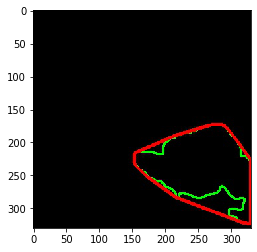

In [2]:
pic = Image.open('Dataset/train/0/saved_img1.jpg')
pic_arr = np.asarray(pic)
print("Image Size: ",pic_arr.shape[0:2])
plt.imshow(pic_arr)

#####  So the average sizes of images is 330 x 330 so resize into 100 x 100

### Dataset

In [3]:
nbatch = 64
i_size = 100

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size=(i_size,i_size),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Dataset/val',
                                            target_size=(i_size,i_size),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 260 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


Text(0.5, 0, 'Class')

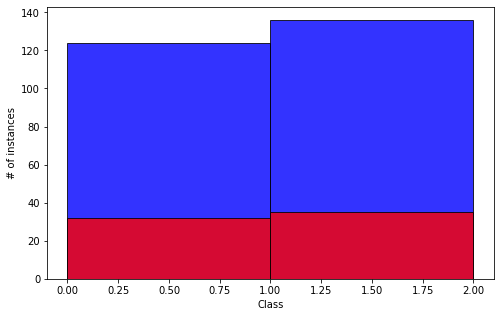

In [4]:
plt.figure(figsize=(8,5))
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

### Model layers

In [5]:
model = keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),activation=tf.nn.relu,input_shape=(i_size,i_size,3)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size=(3, 3),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(512,activation=tf.nn.relu),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation=tf.nn.sigmoid)
])

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

### Compile the Model

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy'])

In [8]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
]

### Train the Model

In [9]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=128,
        epochs=20,
        validation_data=test_set,
        validation_steps=28,
        callbacks = callbacks_list
    )

Epoch 1/20
128/128 [==============================] - 43s 335ms/step - loss: 0.5096 - accuracy: 0.7315 - val_loss: 0.1577 - val_accuracy: 0.9552
Epoch 2/20
128/128 [==============================] - 32s 249ms/step - loss: 0.2877 - accuracy: 0.8766 - val_loss: 0.1245 - val_accuracy: 0.9552
Epoch 3/20
128/128 [==============================] - 35s 271ms/step - loss: 0.2089 - accuracy: 0.9096 - val_loss: 0.0730 - val_accuracy: 0.9701
Epoch 4/20
128/128 [==============================] - 45s 354ms/step - loss: 0.1822 - accuracy: 0.9306 - val_loss: 0.0520 - val_accuracy: 0.9701
Epoch 5/20
128/128 [==============================] - 42s 331ms/step - loss: 0.1209 - accuracy: 0.9502 - val_loss: 0.0332 - val_accuracy: 0.9851
Epoch 6/20
128/128 [==============================] - 38s 299ms/step - loss: 0.0992 - accuracy: 0.9549 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 7/20
128/128 [==============================] - 40s 309ms/step - loss: 0.0942 - accuracy: 0.9614 - val_loss: 0.0274 - val_ac

### Visualize the Result of trained Model

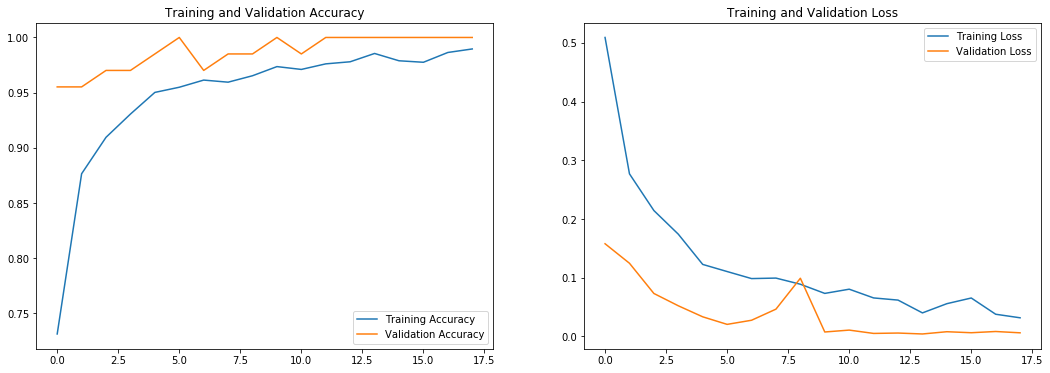

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=len(loss)
epochs_range = range(epochs)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Save the Model

In [11]:
model.save("trained_model.h5")

#### Make sure Saved model working correctly

In [15]:
new_model = tf.keras.models.load_model('trained_model.h5')
new_model.summary()